In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

upload kaggle data

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nakul1412","key":"a15fe762c6822307dff3a1049534a0cf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d gpiosenka/100-bird-species
! mkdir train
! unzip 100-bird-species.zip -d train

load data


In [7]:
from torchvision import datasets
from torchvision import transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
traindata = datasets.ImageFolder('train/birds/train', transform=transform)
trainloader=torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)
testdata = datasets.ImageFolder('train/birds/test', transform=transform)
testloader=torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)
validdata = datasets.ImageFolder('train/birds/valid', transform=transform)
validloader=torch.utils.data.DataLoader(validdata,batch_size=64,shuffle=True)
classes = ['AFRICAN CROWNED CRANE','AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN','AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART','ANHINGA','ANNAS HUMMINGBIRD','ANTBIRD','ARARIPE MANAKIN','ASIAN CRESTED IBIS','BALD EAGLE','BALI STARLING','BALTIMORE ORIOLE','BANANAQUIT','BANDED BROADBILL','BAR-TAILED GODWIT','BARN OWL','BARN SWALLOW','BARRED PUFFBIRD','BAY-BREASTED WARBLER','BEARDED BARBET','BEARDED REEDLING','BELTED KINGFISHER','BIRD OF PARADISE','BLACK & YELLOW bROADBILL','BLACK FRANCOLIN','BLACK SKIMMER','BLACK SWAN','BLACK TAIL CRAKE','BLACK THROATED BUSHTIT','BLACK THROATED WARBLER','BLACK VULTURE','BLACK-CAPPED CHICKADEE','BLACK-NECKED GREBE','BLACK-THROATED SPARROW','BLACKBURNIAM WARBLER','BLUE GROUSE','BLUE HERON','BOBOLINK','BORNEAN BRISTLEHEAD','BORNEAN LEAFBIRD','BROWN NOODY','BROWN THRASHER','BULWERS PHEASANT','CACTUS WREN','CALIFORNIA CONDOR','CALIFORNIA GULL','CALIFORNIA QUAIL','CANARY','CAPE MAY WARBLER','CAPUCHINBIRD','CARMINE BEE-EATER','CASPIAN TERN','CASSOWARY','CEDAR WAXWING','CHARA DE COLLAR','CHIPPING SPARROW','CHUKAR PARTRIDGE','CINNAMON TEAL','CLARKS NUTCRACKER','COCK OF THE  ROCK','COCKATOO','COMMON FIRECREST','COMMON GRACKLE','COMMON HOUSE MARTIN','COMMON LOON','COMMON POORWILL','COMMON STARLING','COUCHS KINGBIRD','CRESTED AUKLET','CRESTED CARACARA','CRESTED NUTHATCH','CROW','CROWNED PIGEON','CUBAN TODY','CURL CRESTED ARACURI','D-ARNAUDS BARBET','DARK EYED JUNCO','DOUBLE BARRED FINCH','DOWNY WOODPECKER','EASTERN BLUEBIRD','EASTERN MEADOWLARK','EASTERN ROSELLA','EASTERN TOWEE','ELEGANT TROGON','ELLIOTS  PHEASANT','EMPEROR PENGUIN','EMU','ENGGANO MYNA','EURASIAN GOLDEN ORIOLE','EURASIAN MAGPIE','EVENING GROSBEAK','FIRE TAILLED MYZORNIS','FLAME TANAGER','FLAMINGO','FRIGATE','GAMBELS QUAIL','GANG GANG COCKATOO','GILA WOODPECKER','GILDED FLICKER','GLOSSY IBIS','GO AWAY BIRD','GOLD WING WARBLER','GOLDEN CHEEKED WARBLER','GOLDEN CHLOROPHONIA','GOLDEN EAGLE','GOLDEN PHEASANT','GOLDEN PIPIT','GOULDIAN FINCH','GRAY CATBIRD','GRAY PARTRIDGE','GREAT POTOO','GREATOR SAGE GROUSE','GREEN JAY','GREEN MAGPIE','GREY PLOVER','GUINEA TURACO','GUINEAFOWL','GYRFALCON','HARPY EAGLE','HAWAIIAN GOOSE','HELMET VANGA','HIMALAYAN MONAL','HOATZIN','HOODED MERGANSER','HOOPOES','HORNBILL','HORNED GUAN','HORNED SUNGEM','HOUSE FINCH','HOUSE SPARROW','IMPERIAL SHAQ','INCA TERN','INDIAN BUSTARD','INDIAN PITTA','INDIGO BUNTING','JABIRU','JAVA SPARROW','KAKAPO','KILLDEAR','KING VULTURE','KIWI','KOOKABURRA','LARK BUNTING','LEARS MACAW','LILAC ROLLER','LONG-EARED OWL','MAGPIE GOOSE','MALABAR HORNBILL','MALACHITE KINGFISHER','MALEO','MALLARD DUCK','MANDRIN DUCK','MARABOU STORK','MASKED BOOBY','MASKED LAPWING','MIKADO  PHEASANT','MOURNING DOVE','MYNA','NICOBAR PIGEON','NOISY FRIARBIRD','NORTHERN BALD IBIS','NORTHERN CARDINAL','NORTHERN FLICKER','NORTHERN GANNET','NORTHERN GOSHAWK','NORTHERN JACANA','NORTHERN MOCKINGBIRD','NORTHERN PARULA','NORTHERN RED BISHOP','NORTHERN SHOVELER','OCELLATED TURKEY','OKINAWA RAIL','OSPREY','OSTRICH','OVENBIRD','OYSTER CATCHER','PAINTED BUNTIG','PALILA','PARADISE TANAGER','PARAKETT  AKULET','PARUS MAJOR','PEACOCK','PELICAN','PEREGRINE FALCON','PHILIPPINE EAGLE','PINK ROBIN','PUFFIN','PURPLE FINCH','PURPLE GALLINULE','PURPLE MARTIN','PURPLE SWAMPHEN','PYGMY KINGFISHER','QUETZAL','RAINBOW LORIKEET','RAZORBILL','RED BEARDED BEE EATER','RED BELLIED PITTA','RED BROWED FINCH','RED FACED CORMORANT','RED FACED WARBLER','RED HEADED DUCK','RED HEADED WOODPECKER','RED HONEY CREEPER','RED TAILED THRUSH','RED WINGED BLACKBIRD','RED WISKERED BULBUL','REGENT BOWERBIRD','RING-NECKED PHEASANT','ROADRUNNER','ROBIN','ROCK DOVE','ROSY FACED LOVEBIRD','ROUGH LEG BUZZARD','ROYAL FLYCATCHER','RUBY THROATED HUMMINGBIRD','RUFOUS KINGFISHER','RUFUOS MOTMOT','SAMATRAN THRUSH','SAND MARTIN','SCARLET IBIS','SCARLET MACAW','SHOEBILL','SHORT BILLED DOWITCHER','SMITHS LONGSPUR','SNOWY EGRET','SNOWY OWL','SORA','SPANGLED COTINGA','SPLENDID WREN','SPOON BILED SANDPIPER','SPOONBILL','SRI LANKA BLUE MAGPIE','STEAMER DUCK','STORK BILLED KINGFISHER','STRAWBERRY FINCH','STRIPPED SWALLOW','SUPERB STARLING','SWINHOES PHEASANT','TAIWAN MAGPIE','TAKAHE','TASMANIAN HEN','TEAL DUCK','TIT MOUSE','TOUCHAN','TOWNSENDS WARBLER','TREE SWALLOW','TRUMPTER SWAN','TURKEY VULTURE','TURQUOISE MOTMOT','UMBRELLA BIRD','VARIED THRUSH','VENEZUELIAN TROUPIAL','VERMILION FLYCATHER','VICTORIA CROWNED PIGEON','VIOLET GREEN SWALLOW','VULTURINE GUINEAFOWL','WATTLED CURASSOW','WHIMBREL','WHITE CHEEKED TURACO','WHITE NECKED RAVEN','WHITE TAILED TROPIC','WHITE THROATED BEE EATER','WILD TURKEY','WILSONS BIRD OF PARADISE','WOOD DUCK','YELLOW BELLIED FLOWERPECKER','YELLOW CACIQUE','YELLOW HEADED BLACKBIRD']

visualize training data

In [8]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

defining model

In [10]:
class Inception_module(nn.Module):
    def __init__(self, in_planes, n1x1, n3x3red, n3x3, n5x5red, n5x5, pool_planes,probility_to_dropout):
        super(Inception_module, self).__init__()
        # 1x1 conv branch
        self.block1 = nn.Sequential(
            nn.Conv2d(in_planes, n1x1, kernel_size=1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU()
        )

        # 1x1 conv -> 3x3 conv branch
        self.block2 = nn.Sequential(
            nn.Conv2d(in_planes, n3x3red, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(n3x3red, n3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU()
        )

        # 1x1 conv -> 5x5 conv branch
        self.block3 = nn.Sequential(
            nn.Conv2d(in_planes, n5x5red, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(n5x5red, n5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(n5x5),
            nn.ReLU()
        )

        # 3x3 pool -> 1x1 conv branch
        self.block4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(in_planes, pool_planes, kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU()
        )
        self.dropout = nn.Dropout2d(p=probility_to_dropout)

    def forward(self, x):
        y1 = self.block1(x)
        y2 = self.block2(x)
        y3 = self.block3(x)
        y4 = self.block4(x)
        return self.dropout(torch.cat([y1,y2,y3,y4], 1))

class network(nn.Module):
    def __init__(self):
        super(network, self).__init__()
        self.conv1_bn=nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 192, kernel_size=3, padding=1)
        self.incep_bn = nn.BatchNorm2d(192)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.inception3a = Inception_module(192, 64, 96, 128, 16, 32, 32,0.1)
        self.inception3b = Inception_module(256, 128, 128, 192, 32, 96, 64,0.1)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.inception4a = Inception_module(480, 192, 96, 208, 16, 48, 64,0.1)
        self.avgpool = nn.AvgPool2d(5, stride=3)
        self.fc1 = nn.Linear(8192,1024)
        self.fc2 = nn.Linear(1024,275)
        self.dropout = nn.Dropout(p=0.7)

        
    def forward(self, x):  ## x.shape= [64,3,224,224]
        x = self.conv1_bn(x)  ## x.shape= [64,3,224,224]  x=output
        x = F.relu(self.conv2_bn(self.conv1(x))) ## x.shape= [64,64,112,112] 
        x = self.maxpool1(x)  ## x.shape= [64,64,56,56]
        x = F.relu(self.conv3_bn(self.conv2(x))) ## x.shape= [64,64,56,56]
        x = F.relu(self.incep_bn(self.conv3(x))) ## x.shape= [64,192,56,56]
        x = self.maxpool2(x) ## x.shape= [64,192,28,28]
        x = self.inception3a(x) ## x.shape= [64,256,28,28]
        x = self.inception3b(x) ## x.shape= [64,480,28,28]
        x = self.maxpool3(x)    ## x.shape= [64,480,14,14] 
        x = self.inception4a(x) ## x.shape= [64,512,14,14]
        x = self.avgpool(x) ## x.shape= [64,512,4,4]
        x = x.view(x.size(0), -1) ## x.shape= [64,512*4*4] 
        x = self.dropout(x)
        x = F.relu(self.fc1(x))## x.shape= [64,1024]
        x = self.dropout(x)
        x = self.fc2(x) ## x.shape= [64,275]
        return x

In [ ]:
# create a complete CNN
model = network()
print(model)

#move tensors to GPU if CUDA is available
if torch.cuda.is_available():
    model.cuda()
    print("gpu on")

uploading trained weights and biases

In [13]:
model.load_state_dict(torch.load('trained_weights_and_biases1.pt'))

<All keys matched successfully>

optimizer and loss function

In [14]:
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()
# specify optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08 ,weight_decay=1e-05)

train the network

In [27]:
# number of epochs to train the model
n_epochs = 2 # you may increase this number to train a final model

valid_loss_min =  0.854114 # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    total_correct =0 
    i=0
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in trainloader:
        i =i +1
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        if i%10==0:

          print(i ,loss)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in validloader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        #finding accuarcy:
        pr=F.softmax(output,dim=1)
        _ , top_class=pr.topk(1,dim=1)
        equal = top_class==target.view(target.shape[0],-1)
        correct=torch.sum(equal.type(torch.FloatTensor))
        total_correct += correct
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(trainloader.dataset)
    valid_loss = valid_loss/len(validloader.dataset)
    accuracy = total_correct
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss ))
    print("accuarcy:",accuracy)
    
    if valid_loss_min == 0:
      valid_loss_min=valid_loss
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'trained_weights_and_biases1.pt')
        valid_loss_min = valid_loss

10 tensor(1.9485, device='cuda:0', grad_fn=<NllLossBackward>)
20 tensor(1.7578, device='cuda:0', grad_fn=<NllLossBackward>)
30 tensor(2.4198, device='cuda:0', grad_fn=<NllLossBackward>)
40 tensor(1.6314, device='cuda:0', grad_fn=<NllLossBackward>)
50 tensor(1.7403, device='cuda:0', grad_fn=<NllLossBackward>)
60 tensor(1.4406, device='cuda:0', grad_fn=<NllLossBackward>)
70 tensor(1.9731, device='cuda:0', grad_fn=<NllLossBackward>)
80 tensor(1.7244, device='cuda:0', grad_fn=<NllLossBackward>)
90 tensor(1.7777, device='cuda:0', grad_fn=<NllLossBackward>)
100 tensor(1.6153, device='cuda:0', grad_fn=<NllLossBackward>)
110 tensor(1.7579, device='cuda:0', grad_fn=<NllLossBackward>)
120 tensor(1.2526, device='cuda:0', grad_fn=<NllLossBackward>)
130 tensor(1.9170, device='cuda:0', grad_fn=<NllLossBackward>)
140 tensor(1.7314, device='cuda:0', grad_fn=<NllLossBackward>)
150 tensor(1.6751, device='cuda:0', grad_fn=<NllLossBackward>)
160 tensor(1.4884, device='cuda:0', grad_fn=<NllLossBackward>)
1

test the train network

In [28]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(275))
class_total = list(0. for i in range(275))

model.eval()
# iterate over test data
for data, target in testloader:
    # move tensors to GPU if CUDA is available
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(data.size(0)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(275):
    if class_total[i] > 0:
      print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.706315

Test Accuracy of AFRICAN CROWNED CRANE: 80% ( 4/ 5)
Test Accuracy of AFRICAN FIREFINCH: 80% ( 4/ 5)
Test Accuracy of ALBATROSS: 60% ( 3/ 5)
Test Accuracy of ALEXANDRINE PARAKEET: 100% ( 5/ 5)
Test Accuracy of AMERICAN AVOCET: 100% ( 5/ 5)
Test Accuracy of AMERICAN BITTERN: 60% ( 3/ 5)
Test Accuracy of AMERICAN COOT: 80% ( 4/ 5)
Test Accuracy of AMERICAN GOLDFINCH: 100% ( 5/ 5)
Test Accuracy of AMERICAN KESTREL: 80% ( 4/ 5)
Test Accuracy of AMERICAN PIPIT: 100% ( 5/ 5)
Test Accuracy of AMERICAN REDSTART: 60% ( 3/ 5)
Test Accuracy of ANHINGA: 80% ( 4/ 5)
Test Accuracy of ANNAS HUMMINGBIRD: 100% ( 5/ 5)
Test Accuracy of ANTBIRD: 80% ( 4/ 5)
Test Accuracy of ARARIPE MANAKIN: 100% ( 5/ 5)
Test Accuracy of ASIAN CRESTED IBIS: 100% ( 5/ 5)
Test Accuracy of BALD EAGLE: 100% ( 5/ 5)
Test Accuracy of BALI STARLING: 80% ( 4/ 5)
Test Accuracy of BALTIMORE ORIOLE: 80% ( 4/ 5)
Test Accuracy of BANANAQUIT: 60% ( 3/ 5)
Test Accuracy of BANDED BROADBILL: 80% ( 4/ 5)
Test Accuracy o

Visualize Sample Test Results

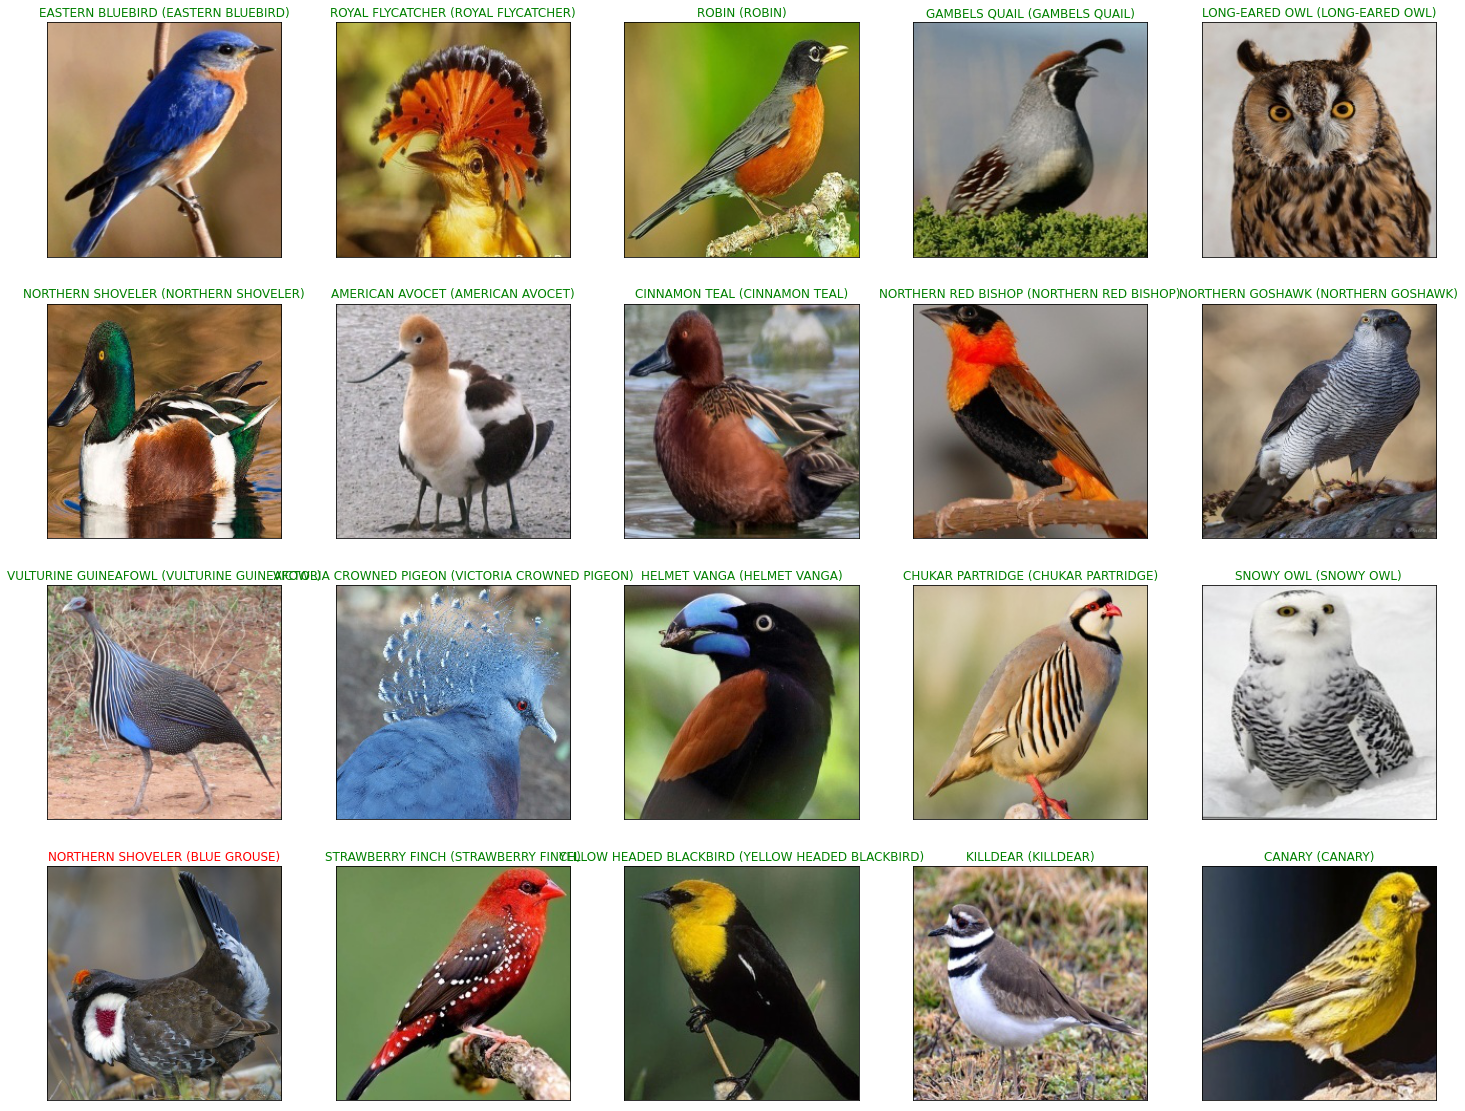

In [29]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

if torch.cuda.is_available():
    images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 25))
for idx in np.arange(20):
    ax = fig.add_subplot(5, 20/4, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not torch.cuda.is_available() else images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))